In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
df = pd.read_csv('Cleaned_DataSet.csv')

In [2]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Transaction Date
0,TXN_1961373,coffee,2.0,2.0,4.0,2023-09-08
1,TXN_4977031,cake,4.0,3.0,12.0,2023-05-16
2,TXN_4271903,cookie,4.0,1.0,8.0,2023-07-19
3,TXN_7034554,salad,2.0,5.0,10.0,2023-04-27
4,TXN_3160411,coffee,2.0,2.0,4.0,2023-06-11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9741 entries, 0 to 9740
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9741 non-null   object 
 1   Item              9741 non-null   object 
 2   Quantity          9741 non-null   float64
 3   Price Per Unit    9741 non-null   float64
 4   Total Spent       9741 non-null   float64
 5   Transaction Date  9741 non-null   object 
dtypes: float64(3), object(3)
memory usage: 456.7+ KB


In [6]:
print(df.describe())

          Quantity  Price Per Unit  Total Spent
count  9741.000000     9741.000000  9741.000000
mean      2.977312        2.901499     8.449287
std       1.366510        1.217124     5.307016
min       1.000000        1.000000     1.000000
25%       2.000000        2.000000     4.000000
50%       3.000000        3.000000     8.000000
75%       4.000000        4.000000    12.000000
max       5.000000        5.000000    20.000000


In [9]:
print(df.isnull().sum())

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Transaction Date    0
dtype: int64


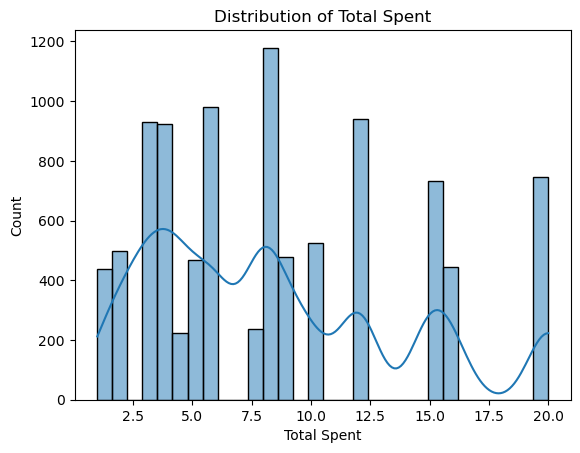

In [13]:
plt.figure()
sns.histplot(df["Total Spent"], bins=30, kde=True)
plt.title("Distribution of Total Spent")
plt.show()

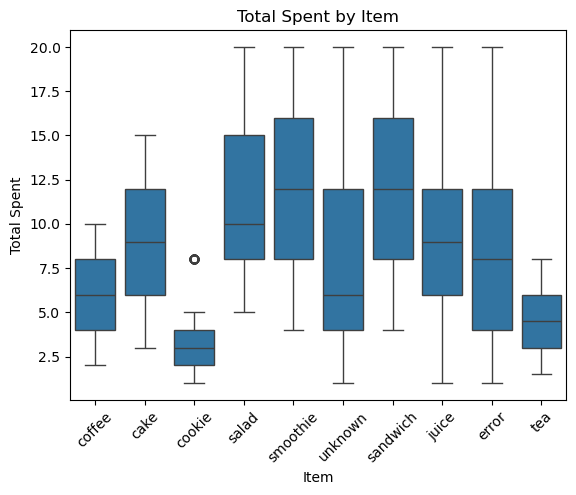

In [14]:
plt.figure()
sns.boxplot(x="Item", y="Total Spent", data=df)
plt.title("Total Spent by Item")
plt.xticks(rotation=45)
plt.show()

In [15]:
df = df.drop("Transaction ID", axis=1)

In [16]:
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"])
df["year"] = df["Transaction Date"].dt.year
df["month"] = df["Transaction Date"].dt.month
df["day"] = df["Transaction Date"].dt.day
df = df.drop("Transaction Date", axis=1)
le = LabelEncoder()
df["Item"] = le.fit_transform(df["Item"])

In [17]:
X = df.drop("Total Spent", axis=1)
y = df["Total Spent"]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Performance:")
print("MAE:", mae)
print("R2 Score:", r2)


Model Performance:
MAE: 1.680717496830966
R2 Score: 0.7976819036017085


In [21]:
sample = X_test.iloc[0:1]
predicted_value = model.predict(sample)
print("\nSample Prediction:", predicted_value[0])
print("Actual Value:", y_test.iloc[0])


Sample Prediction: 14.179461925853786
Actual Value: 10.0
